In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import warnings
warnings.simplefilter (action = 'ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_csv('/kaggle/input/hr-analytics-predictive-analysis/general_data.csv') #dataseti yükleme

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pd.set_option('display.max_columns', None)  #Tüm sütunları noktalama olmadan görmeyi sağlıyor
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8


In [3]:
df.info() #dataseti tanıma

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [4]:
df.duplicated().sum()

0

In [5]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [6]:
missing_values = df.isnull().sum()
print("Eksik veriler:\n", missing_values)

Eksik veriler:
 Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [7]:
df['NumCompaniesWorked'].isnull().sum()

19

In [8]:
df.dropna(subset=['NumCompaniesWorked', 'TotalWorkingYears'], inplace=True) #eksik veri sayısı oldukça az olduğundan ve modelin performansını etkilemeceğinden eksik değerli satırlar silindi.
print("Kalan veri sayısı:", len(df))

Kalan veri sayısı: 4382


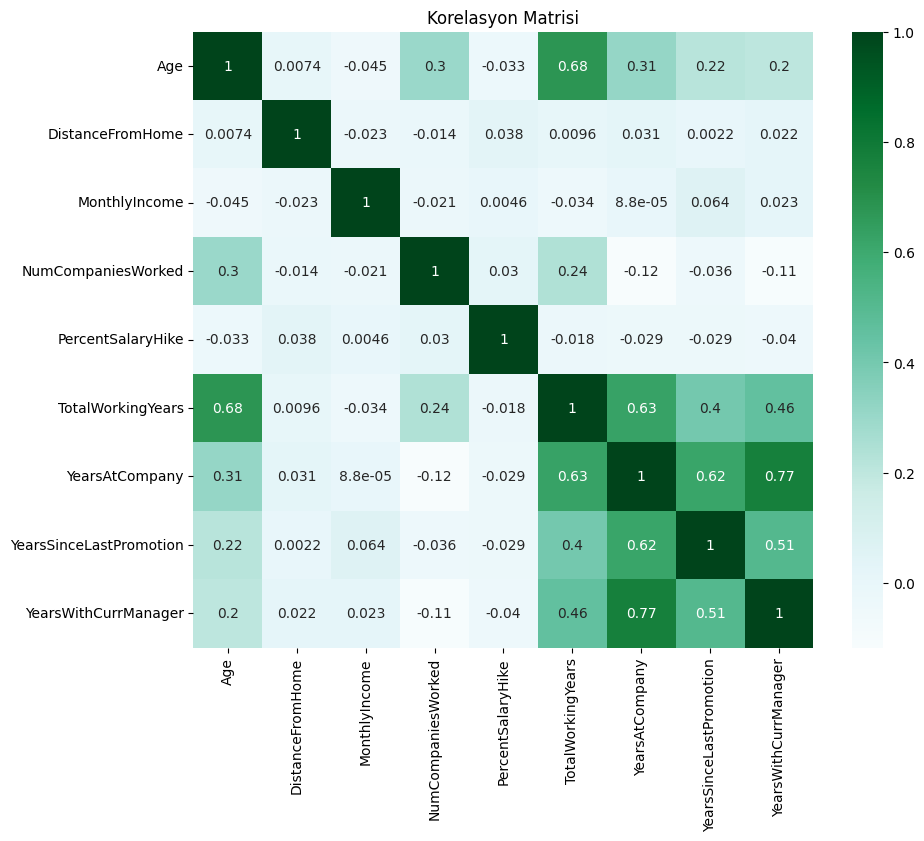

In [9]:
# Sayısal sütunları seçelim
df_corr = df[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

# Korelasyon matrisini hesaplayalım
df_corr = df_corr.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_corr, annot=True, cmap='BuGn')
plt.title('Korelasyon Matrisi')
plt.show()

Bu korelasyon matrisi, veri setindeki sayısal değişkenler arasındaki ilişkileri gösteriyor. Korelasyon katsayıları -1 ile 1 arasında değişir ve 1'e yakın değerler iki değişken arasında güçlü bir pozitif ilişki olduğunu, -1'e yakın değerler ise güçlü bir negatif ilişki olduğunu belirtir.

Grafikte dikkat çeken bazı noktalar şunlardır:

TotalWorkingYears ile Age arasında 0.68'lik güçlü bir pozitif korelasyon var, bu da beklenen bir durum çünkü çalışanların toplam çalışma yılları genellikle yaşla birlikte artar.
YearsWithCurrManager ve YearsAtCompany arasında 0.77'lik bir korelasyon görülüyor, bu da çalışanların genellikle aynı yöneticide uzun süre kaldıklarını gösteriyor.
YearsAtCompany ve TotalWorkingYears arasında da 0.63'lük bir korelasyon var, bu da şirkette geçirilen süre ile toplam çalışma yılları arasında anlamlı bir ilişki olduğunu gösteriyor.

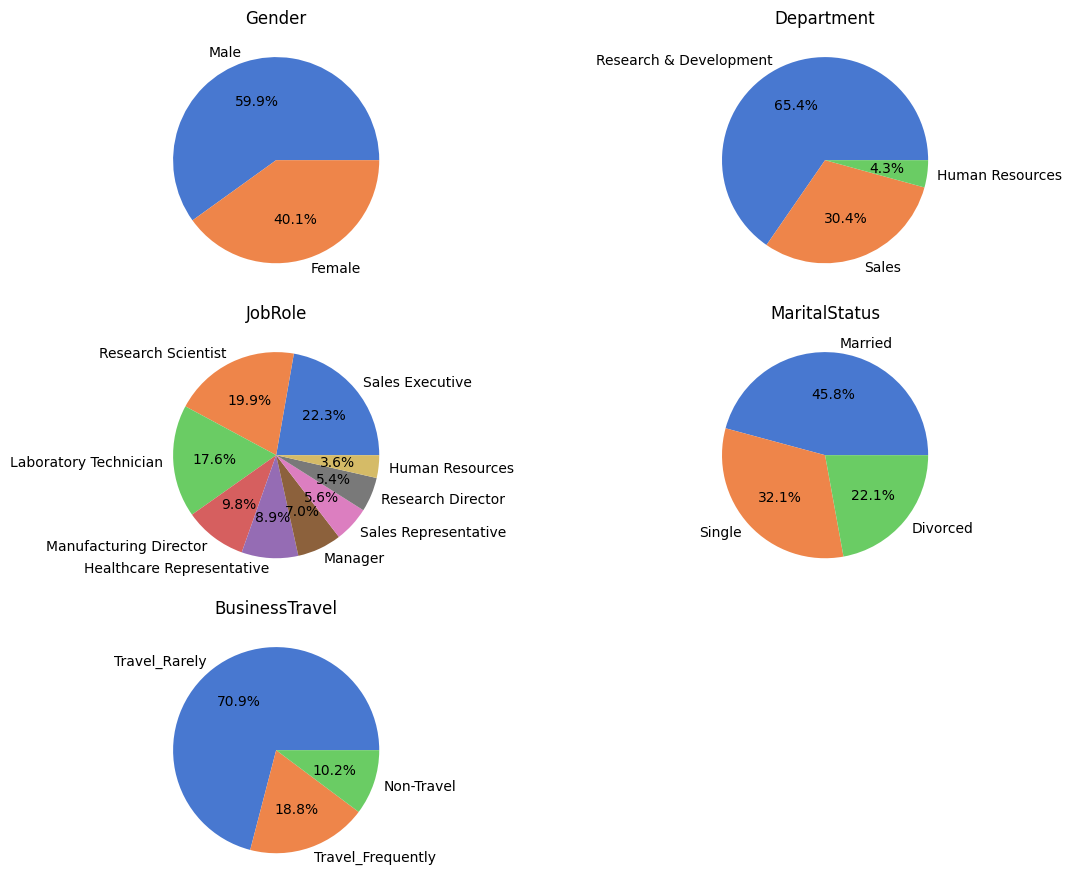

In [10]:
plt.figure(figsize=(12, 9))

# Kategorik değişkenler
categorical_cols = ['Gender', 'Department', 'JobRole', 'MaritalStatus', 'BusinessTravel']

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    x = df[col].value_counts().reset_index()
    x.columns = [col, 'count']  # Sütun isimlerini doğru ayarlıyoruz
    plt.title(col)
    plt.pie(x['count'], labels=x[col], autopct="%0.1f%%", colors=sns.color_palette('muted'))

plt.tight_layout()
plt.show()

Bu grafikler, cinsiyet (Gender), departman (Department), iş rolü (JobRole), medeni durum (MaritalStatus) ve iş seyahati (BusinessTravel) gibi kategorik değişkenlerin dağılımlarını gösteriyor.

1. Gender (Cinsiyet): Çalışanların %59.9'u erkek, %40.1'i ise kadın. Erkek çalışanların sayısının kadınlardan fazla olduğu görülüyor.

2. Department (Departman): Çalışanların %65.4'ü Araştırma ve Geliştirme (Research & Development) departmanında çalışırken, %30.4'ü Satış (Sales) departmanında yer alıyor. İnsan Kaynakları (Human Resources) departmanında çalışan oranı ise %4.3 ile en düşük.

3. JobRole (İş Rolü): Çalışanların en büyük kısmı %22.3 ile Satış Yöneticisi (Sales Executive) pozisyonunda. Bunu %19.9 ile Araştırma Bilimcisi (Research Scientist) ve %17.6 ile Laboratuvar Teknisyeni (Laboratory Technician) izliyor. En az çalışan %3.9 oranıyla Sağlık Temsilcisi (Healthcare Representative) rolünde.

4. MaritalStatus (Medeni Durum): Çalışanların %45.8'i evli (Married), %32.1'i bekar (Single), %22.1'i ise boşanmış (Divorced). Bu dağılımda evli çalışanların çoğunlukta olduğu görülüyor.

5. BusinessTravel (İş Seyahati): Çalışanların %70.9'u nadiren iş seyahati yaparken (Travel_Rarely), %18.8'i sık seyahat ediyor (Travel_Frequently). Seyahat etmeyenlerin (Non-Travel) oranı ise %10.2 ile en düşük.

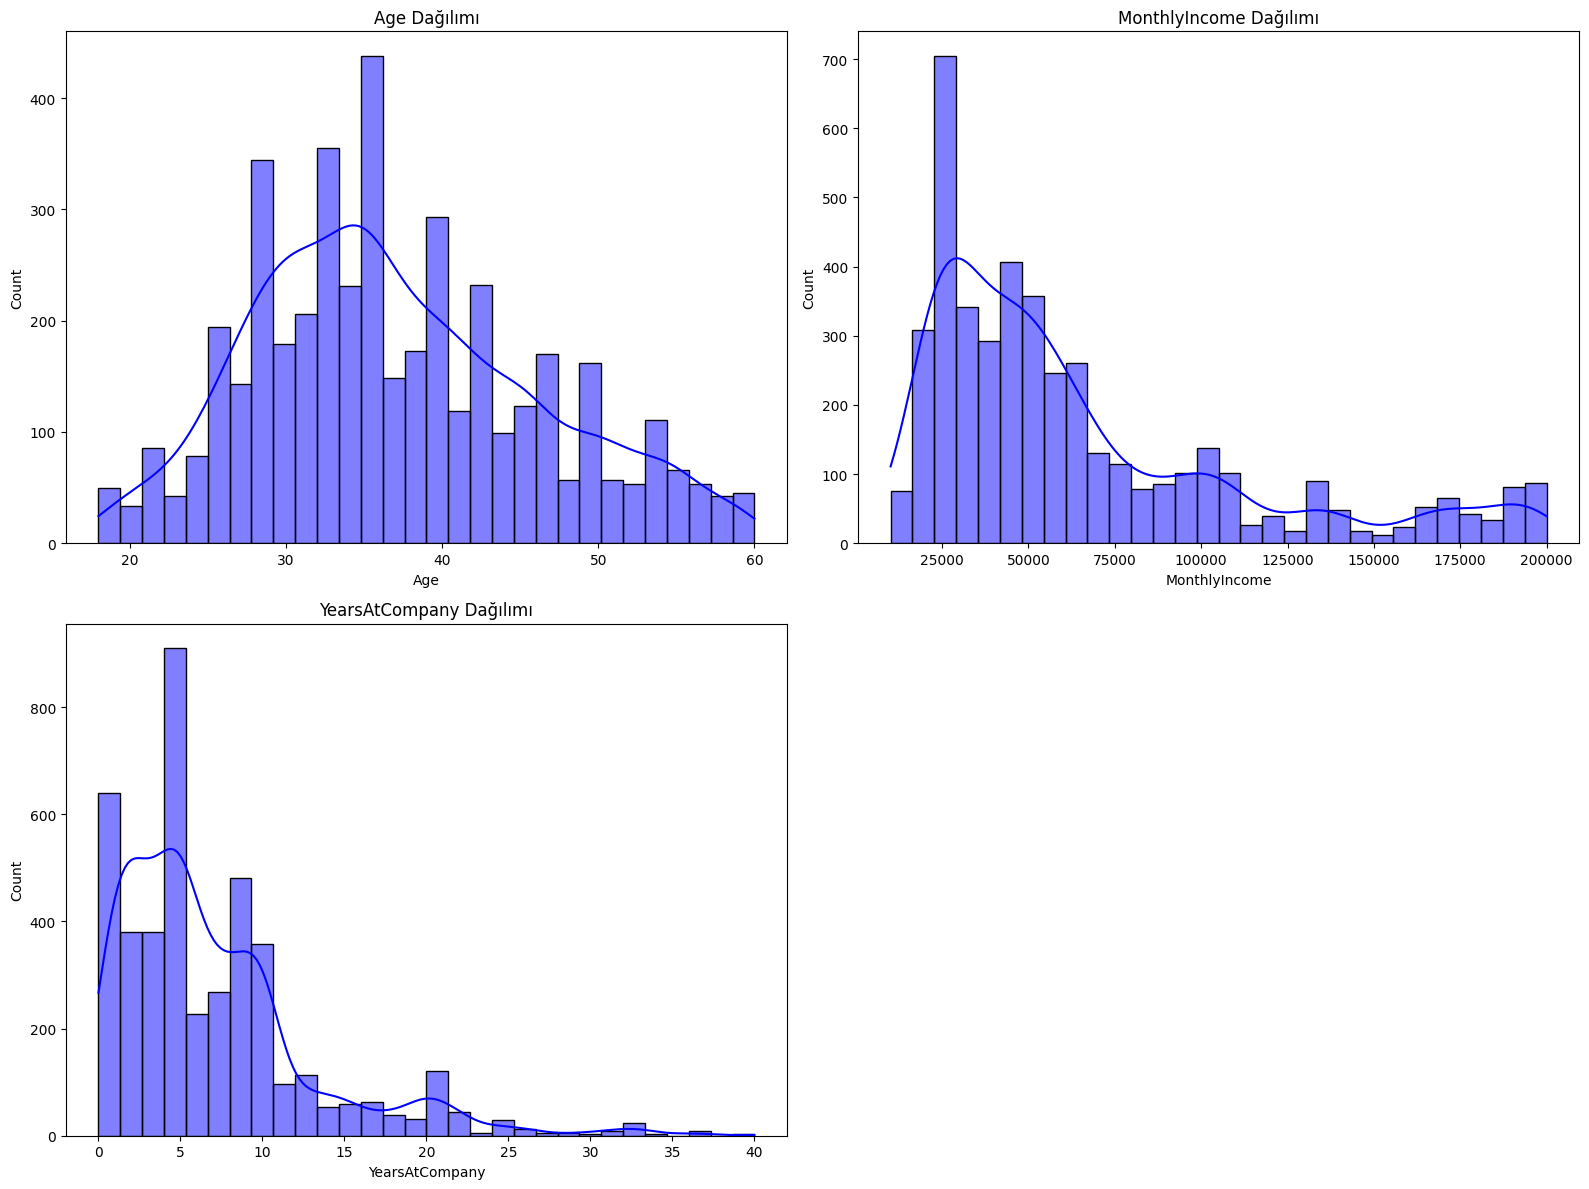

In [11]:
# Sayısal değişkenler için histogramlar
numerical_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany']

# Histogramlar için görselleştirme
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=col, kde=True, bins=30, color='blue')
    plt.title(f"{col} Dağılımı")

plt.tight_layout()
plt.show()

Bu üç grafikte, yaş (Age), aylık gelir (MonthlyIncome) ve şirkette geçirilen yıl (YearsAtCompany) dağılımları incelenmiştir.

1. Yaş Dağılımı: Çalışanların yaş dağılımı genel olarak simetrik bir dağılım göstermektedir. 30'lu yaşlarda çalışan yoğunluğu en yüksektir, özellikle 35 yaş civarında zirve yapmaktadır. Bu, şirketin çalışan kitlesinin çoğunlukla orta yaş grubunda olduğunu göstermektedir.

2. Aylık Gelir Dağılımı: Aylık gelir (MonthlyIncome) dağılımında sağa çarpık bir yapı gözlemlenmektedir. Çalışanların büyük bir çoğunluğu 5000 ile 10.000 arasındaki maaş diliminde toplanmıştır. Ancak, gelir dağılımı geniş bir aralığa sahiptir ve 200.000'e kadar çıkan maaşlar da bulunmaktadır. Yüksek maaş alan çalışanların sayısı oldukça azdır ve bu, maaşlar arasındaki farklılıkların geniş olduğunu gösterir.

3. Şirkette Geçirilen Yıl Dağılımı (YearsAtCompany): Çalışanların şirkette çalışma süresi dağılımı daha çok düşük yıllar tarafına yoğunlaşmıştır. Çoğu çalışan 5 yıldan az bir süredir şirkette çalışmaktadır. Bunun yanında, 10 yılın üzerinde çalışan sayısı oldukça azdır. Bu durum, çalışanların şirkette uzun süre kalmadığını veya yeni çalışanların yoğunlukta olduğunu gösterebilir.

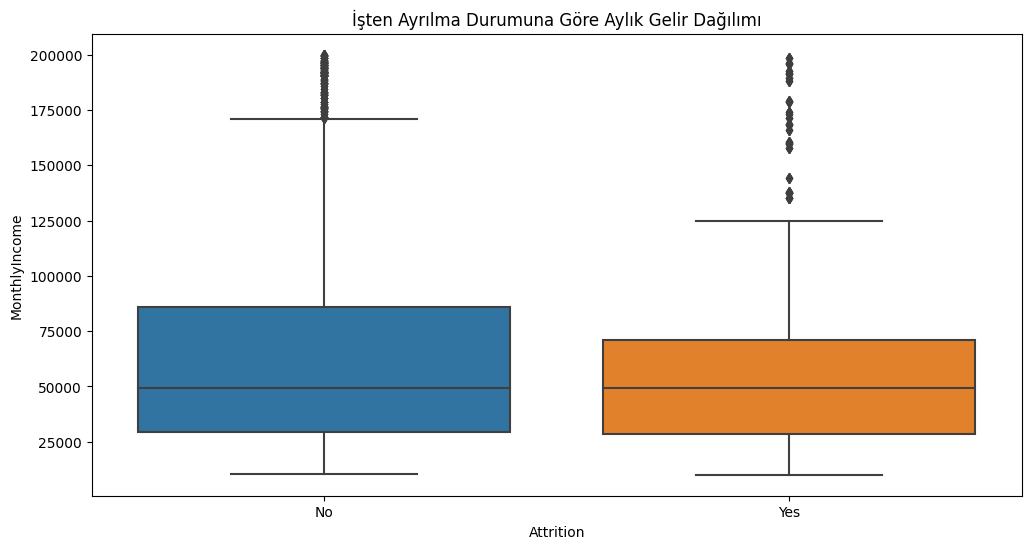

In [12]:
# İşten ayrılma (Attrition) durumuna göre gelir dağılımı
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("İşten Ayrılma Durumuna Göre Aylık Gelir Dağılımı")
plt.show()

Bu grafikte, işten ayrılma durumu (Attrition) ile aylık gelir (MonthlyIncome) arasındaki ilişkiyi incelemekteyiz. Görüldüğü üzere, işten ayrılmayan çalışanlar ("No") için aylık gelir dağılımı daha geniş bir aralıkta yer alıyor ve genel olarak daha yüksek seviyelerde bulunuyor. Öte yandan, işten ayrılan çalışanlar ("Yes") için aylık gelir genellikle daha düşük seviyelerde toplanmış durumda. Ayrıca, işten ayrılanlar grubunda bazı aşırı uç (outlier) değerler bulunuyor, ancak genel olarak bu gruptaki çalışanlar daha düşük maaş alıyorlar. Bu durum, düşük gelir seviyesinin çalışanların işten ayrılma olasılığını artırabileceğini düşündürebilir.

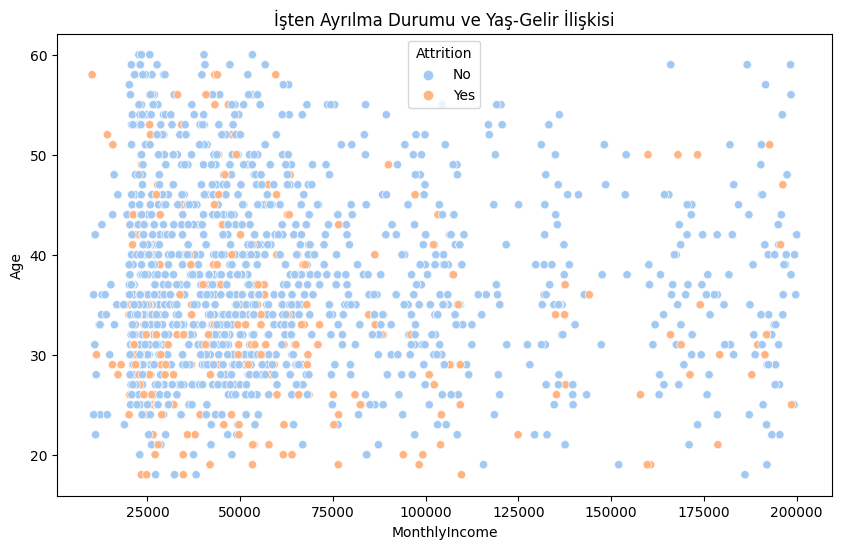

In [13]:
# Attrition ve MonthlyIncome arasındaki ilişkiyi scatter plot ile görselleştirelim
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="MonthlyIncome", y="Age", hue="Attrition", palette=sns.color_palette("pastel"))
plt.title("İşten Ayrılma Durumu ve Yaş-Gelir İlişkisi")
plt.show()

Bu grafikte, çalışanların yaş (Age), aylık gelir (MonthlyIncome), ve işten ayrılma durumu (Attrition) arasındaki ilişkiyi scatter plot ile incelemekteyiz. Grafikte, farklı yaş gruplarındaki çalışanların gelirlerine göre dağılımı ve işten ayrılma durumları gösterilmiştir. Mavi noktalar işten ayrılmayanları, turuncu noktalar ise işten ayrılanları temsil etmektedir. Genel olarak, aylık geliri düşük olan çalışanlar arasında işten ayrılma oranının daha yüksek olduğunu gözlemleyebiliyoruz. Ayrıca, yaş ilerledikçe, daha yüksek maaşlara sahip çalışanların işten ayrılma eğilimlerinin azaldığı söylenebilir. Yüksek maaş alan çalışanlar arasında ise işten ayrılma oranı oldukça düşük. Bu durum, daha yüksek maaşların çalışanların şirkette kalma olasılığını artırdığına işaret ediyor olabilir.

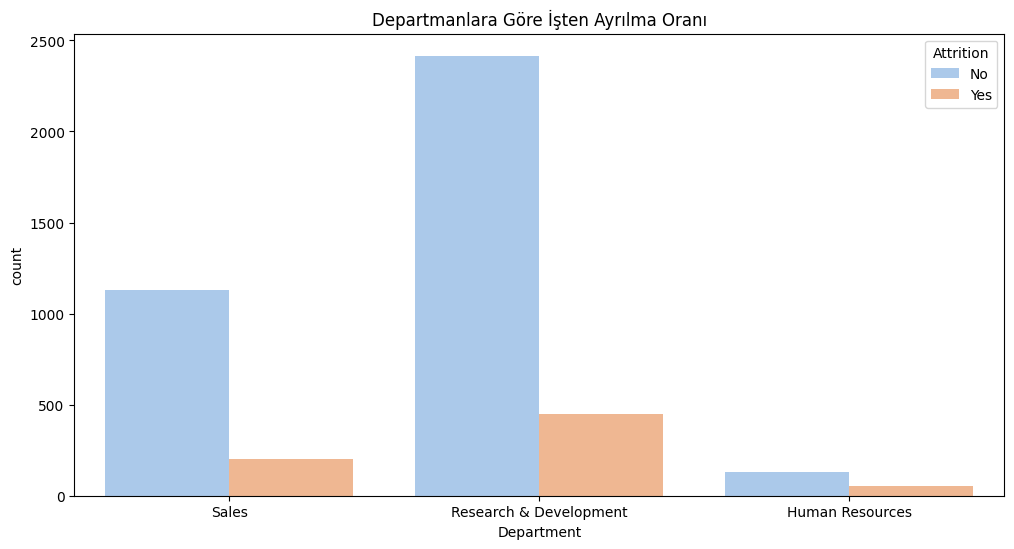

In [14]:
# Departmanlara göre cinsiyet ve işten ayrılma oranlarını bar plot ile karşılaştıralım
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Department", hue="Attrition", palette=sns.color_palette("pastel"))
plt.title("Departmanlara Göre İşten Ayrılma Oranı")
plt.show()

Bu grafikte, departmanlara göre işten ayrılma oranları (Attrition) karşılaştırılmaktadır. Görüldüğü üzere, Research & Development departmanında çalışanların büyük bir kısmı işte kalmayı tercih etmişken, Sales departmanında işten ayrılma oranı daha yüksek çıkmıştır. Özellikle satış departmanında işten ayrılma oranı diğer departmanlara kıyasla oldukça yüksektir. Öte yandan, Human Resources (İnsan Kaynakları) departmanında hem işte kalan hem de işten ayrılanların sayısı oldukça düşük seviyededir. Bu sonuçlar, departmanlar arasındaki işten ayrılma eğilimlerinin farklı olduğunu ve özellikle satış departmanında çalışanların işten ayrılma eğiliminin daha yüksek olduğunu göstermektedir.

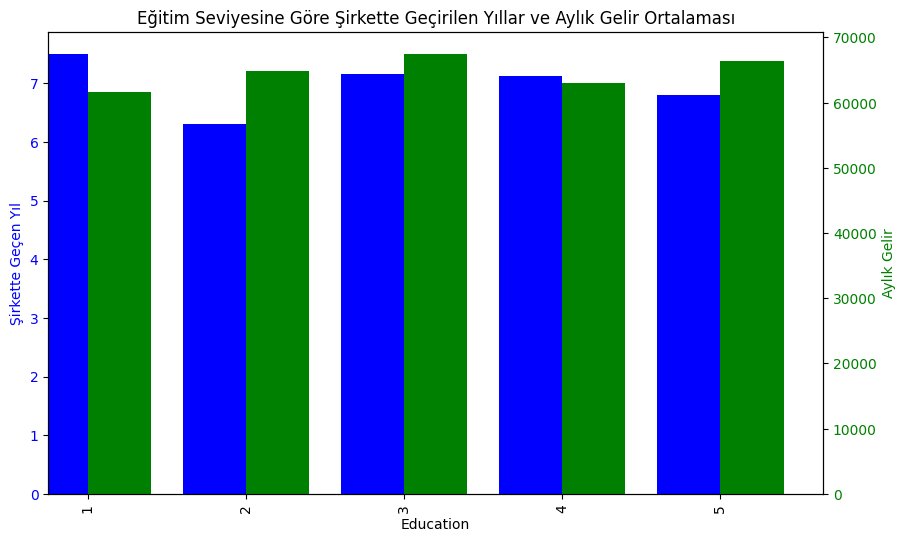

In [15]:
# Gruplama ve ortalama alma
grouped_df = df.groupby("Education")[["YearsAtCompany", "MonthlyIncome"]].mean()

# Yeni bir figür ve eksen oluştur
fig, ax1 = plt.subplots(figsize=(10, 6))

# İlk eksende YearsAtCompany'yi çiz
ax1.set_xlabel('Eğitim Seviyesi')
ax1.set_ylabel('Şirkette Geçen Yıl', color='blue')
grouped_df["YearsAtCompany"].plot(kind="bar", ax=ax1, color='blue', position=1, width=0.4)
ax1.tick_params(axis='y', labelcolor='blue')

# İkinci bir eksen oluştur ve MonthlyIncome'yi çiz
ax2 = ax1.twinx()
ax2.set_ylabel('Aylık Gelir', color='green')
grouped_df["MonthlyIncome"].plot(kind="bar", ax=ax2, color='green', position=0, width=0.4)
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Eğitim Seviyesine Göre Şirkette Geçirilen Yıllar ve Aylık Gelir Ortalaması")
plt.show()

Bu grafikte, çalışanların eğitim seviyesine göre şirkette geçirdikleri yıllar (mavi çubuklarla gösterilen) ve aylık gelir ortalamaları (yeşil çubuklarla gösterilen) karşılaştırılmaktadır. Genel olarak, eğitim seviyesi arttıkça çalışanların hem şirkette geçirdikleri yılların hem de aldıkları aylık gelirin arttığı gözlemlenmektedir. Özellikle, eğitim seviyesi 5 (muhtemelen yüksek lisans veya doktora) olan çalışanlar en yüksek aylık gelir ortalamasına sahipken, daha düşük eğitim seviyelerinde maaşlar nispeten daha düşük seviyede kalmaktadır. Benzer şekilde, daha yüksek eğitim seviyesine sahip olan çalışanlar şirkette daha uzun süre çalışmışlardır, bu da deneyim ve kıdemle birleşen bir gelir artışı olduğunu göstermektedir.

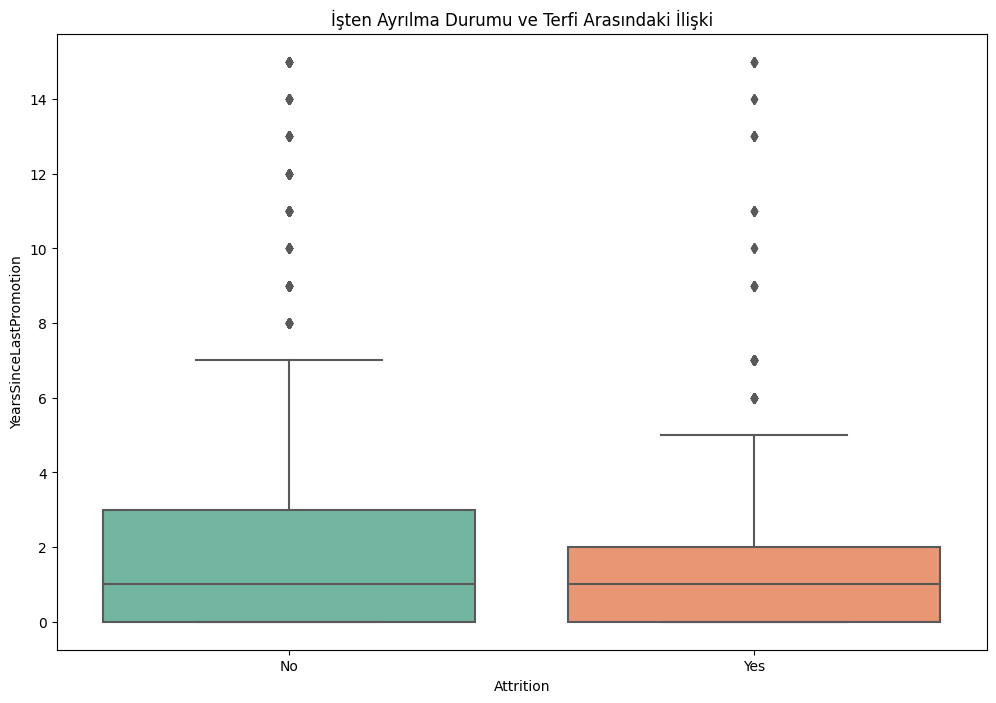

In [16]:
# Çalışanların işte geçirdikleri yıl, terfi süresi ve işten ayrılma arasındaki ilişki
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Attrition", y="YearsSinceLastPromotion", palette=sns.color_palette("Set2"))
plt.title("İşten Ayrılma Durumu ve Terfi Arasındaki İlişki")
plt.show()

Bu grafikte, işten ayrılma durumu ile son terfi arasındaki yıllar arasındaki ilişkiyi görüyoruz. İşten ayrılmayan çalışanların terfi süreleri daha geniş bir aralıkta dağılırken, ortalama terfi süresi 2-4 yıl arasında yoğunlaşmıştır ve birçok çalışan uzun süre terfi almadan çalışmıştır. Öte yandan, işten ayrılan çalışanların terfi süreleri daha kısa ve genellikle 2 yılın altındadır. Ayrıca, bu grupta aykırı değerlerin daha az olması, terfi alamayan çalışanların daha kısa süre içinde işten ayrılma eğiliminde olduğunu gösteriyor. Bu durum, çalışanların terfi almadıkça işten ayrılma olasılıklarının arttığını düşündürebilir.

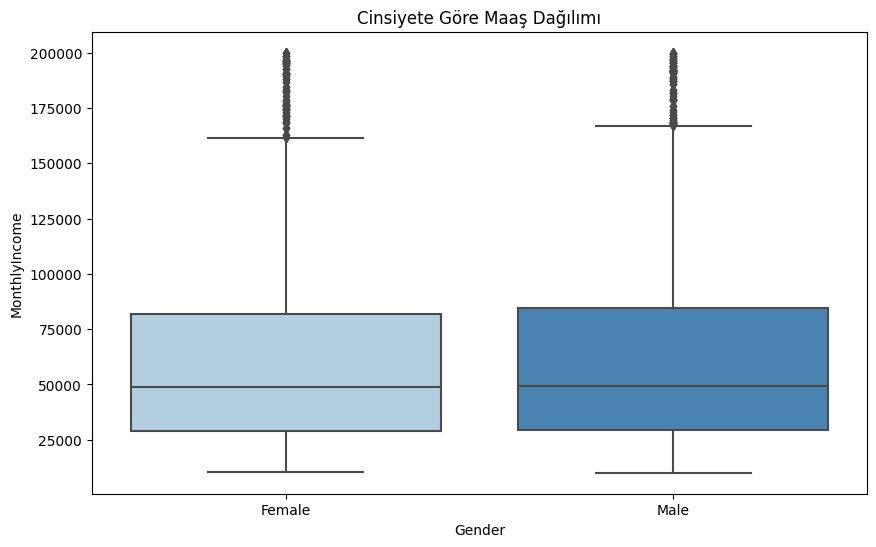

In [17]:
# Cinsiyet ve maaş arasındaki ilişkiyi gösterelim
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Gender", y="MonthlyIncome", palette="Blues")
plt.title("Cinsiyete Göre Maaş Dağılımı")
plt.show()

Bu grafikte, erkek ve kadın çalışanların aylık gelir dağılımı kıyaslanmaktadır. Görüldüğü üzere, erkek çalışanların maaşları genellikle kadınlara kıyasla daha yüksek bir ortalamaya sahiptir, çünkü erkeklerin medyan maaşı (kutunun ortasındaki çizgi) kadınlarınkinden daha yüksekte yer almaktadır. Ayrıca, erkek çalışanların maaşları daha geniş bir aralıkta dağılırken, kadın çalışanların maaşları daha dar bir dağılım sergilemektedir. Erkeklerde daha fazla uç (outlier) değer görülmektedir, bu da bazı erkek çalışanların maaşlarının diğerlerinden oldukça farklı olduğu anlamına gelir. Bu grafik, cinsiyetler arasında maaş farklarının belirgin olabileceğini göstermektedir.

In [18]:
# Departman ve işten ayrılma durumu
df.groupby(['Department', 'Attrition'])['Attrition'].count()

Department              Attrition
Human Resources         No            132
                        Yes            55
Research & Development  No           2416
                        Yes           449
Sales                   No           1129
                        Yes           201
Name: Attrition, dtype: int64

Bu sonuçlar, farklı departmanlarda işten ayrılma oranlarının değişiklik gösterdiğini ortaya koyuyor. Human Resources departmanında işten ayrılma oranı oldukça yüksek (%30), bu da departmandaki çalışan memnuniyetiyle ilgili sorunlar olabileceğini düşündürebilir. Research & Development departmanında işten ayrılma oranı %15,6 iken, Sales departmanında bu oran %15. Genel olarak, işten ayrılmaların daha yüksek olduğu departman Human Resources departmanı diyebiliriz.

In [19]:
# LabelEncoder nesnesi oluşturma
le = LabelEncoder()

# Dönüştürülecek kategorik sütunlar
columns_to_encode = ['MaritalStatus', 'Gender', 'Department', 'BusinessTravel', 'Attrition']

# Seçilen sütunlara Label Encoding uygulama
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

print(df[columns_to_encode].head())

   MaritalStatus  Gender  Department  BusinessTravel  Attrition
0              1       0           2               2          0
1              2       0           1               1          1
2              1       1           1               1          0
3              1       1           1               0          0
4              2       1           1               2          0


'MaritalStatus', 'Gender', 'Department', 'BusinessTravel', 'Attrition' sütunları az sayıda unique değer içerdiğinden bu sütunlara label encoding uygulandı.

In [20]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder nesnesi oluşturma
ohe = OneHotEncoder()

# 'EducationField' ve 'JobRole' sütunlarına One-Hot Encoding uygulama
xd = ohe.fit_transform(df[['EducationField', 'JobRole']]).toarray()

# Sonucu DataFrame'e dönüştürme ve indeksleri sıfırlama
xd = pd.DataFrame(xd)
xd.columns = ohe.get_feature_names_out(['EducationField', 'JobRole'])
xd.reset_index(drop=True, inplace=True)

# Orijinal df'ye One-Hot Encoding sonucu oluşan sütunları ekleme, indeks sıfırlanmış olmalı
df.reset_index(drop=True, inplace=True)  # Orijinal df'nin indeksini de sıfırlıyoruz
df = pd.concat([df, xd], axis=1)

# Eski 'EducationField' ve 'JobRole' sütunlarını silme
df = df.drop(['EducationField', 'JobRole'], axis=1)

print(df.head())

   Age  Attrition  BusinessTravel  Department  DistanceFromHome  Education  \
0   51          0               2           2                 6          2   
1   31          1               1           1                10          1   
2   32          0               1           1                17          4   
3   38          0               0           1                 2          5   
4   32          0               2           1                10          1   

   EmployeeCount  EmployeeID  Gender  JobLevel  MaritalStatus  MonthlyIncome  \
0              1           1       0         1              1         131160   
1              1           2       0         1              2          41890   
2              1           3       1         4              1         193280   
3              1           4       1         3              1          83210   
4              1           5       1         1              2          23420   

   NumCompaniesWorked Over18  PercentSalaryHike  S

'EducationField', 'JobRole' sütunları fazla sayıda eşsiz değer içerdiğinden one hot encoding uygulandı.

In [21]:
df = df.drop(['Over18'], axis=1) 

Tek değerli değişkenlerin varyansı yoktur, bu da modelin bu değişkenden hiçbir bilgi öğrenemeyeceği anlamına gelir. Bu tür gereksiz sütunları kaldırmak, modelin gereksiz hesaplamalar yapmasını engeller ve veri setini daha verimli hale getirir.

In [22]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,51,0,2,2,6,2,1,1,0,1,1,131160,1.0,11,8,0,1.0,6,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31,1,1,1,10,1,1,2,0,1,2,41890,0.0,23,8,1,6.0,3,5,1,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,32,0,1,1,17,4,1,3,1,4,1,193280,1.0,15,8,3,5.0,2,5,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,38,0,0,1,2,5,1,4,1,3,1,83210,3.0,11,8,3,13.0,5,8,7,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,2,1,10,1,1,5,1,1,2,23420,4.0,12,8,2,9.0,2,6,0,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,29,0,2,2,4,3,1,4405,0,2,2,35390,1.0,18,8,0,6.0,2,6,1,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4378,42,0,2,1,5,4,1,4406,0,1,2,60290,3.0,17,8,1,10.0,5,3,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4379,29,0,2,1,2,4,1,4407,1,1,0,26790,2.0,15,8,0,10.0,2,3,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4380,25,0,2,1,25,2,1,4408,1,2,1,37020,0.0,20,8,0,5.0,4,4,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Bağımlı değişken (Attrition)
y = df[['Attrition']]  # "Attrition" sütunu bağımlı değişken olarak alınır

# Bağımsız değişkenler (Attrition hariç tüm sütunlar)
x = df.drop(["Attrition"], axis=1)  # "Attrition" sütunu hariç diğer sütunlar bağımsız değişkenler olur


In [24]:
# Veriyi eğitim ve test setlerine bölme (train %70, test %30)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=35)

In [25]:
# Veriyi ölçeklendirme (StandardScaler kullanarak)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train[:5])  
print(y_train[:5])  

[[ 0.56230116 -0.92533433  1.40856026 -0.88746737  1.05549219  0.
  -1.30809638  0.82216561 -0.94988076  1.2314971  -0.88498992 -1.0787228
   0.22924746  0.         -0.94233072  1.37604766  0.16626911  2.30756062
   3.33922305  2.80049152 -0.14005128  1.19352668 -0.34605164 -0.68268674
  -0.24148723 -0.31132648 -0.31446667 -0.19648106  2.16081726 -0.28539928
  -0.32561075 -0.23305407 -0.49469589 -0.53625877 -0.23844777]
 [-0.20549402 -2.43893454 -0.4870318  -1.01026739 -1.86792252  0.
  -1.26846635  0.82216561 -0.04485302 -0.14797756  1.51001877  0.52362268
   1.8694542   0.          1.44029773  0.60621733  0.95201237  0.99482454
   0.55286955  2.23625388 -0.14005128  1.19352668 -0.34605164 -0.68268674
  -0.24148723 -0.31132648 -0.31446667 -0.19648106 -0.46278786 -0.28539928
  -0.32561075 -0.23305407 -0.49469589  1.86477137 -0.23844777]
 [-0.31517904  0.58826588 -0.4870318   0.34053282 -0.89345095  0.
   0.88978496  0.82216561 -0.04485302 -1.52745221  0.50654714 -0.67813643
  -1.137591

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [27]:
# Gözetimli öğrenme sınıflandırıcıları
supervised_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "SVC": SVC(),
    "XGBoost Classifier": XGBClassifier()
}

# Gözetimsiz öğrenme modelleri
unsupervised_models = {
    "K-Means Clustering": KMeans(n_clusters=2),
    "DBSCAN": DBSCAN(),
    "Gaussian Mixture Model": GaussianMixture(n_components=2)
}

In [28]:
# Gözetimli öğrenme modelleri için eğitim ve performans değerlendirmesi
for name, model in supervised_classifiers.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}\n")
    
    # Çapraz doğrulama ile performans
    cv_scores = cross_validate(model, x_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1'], cv=10)
    cv_results = pd.DataFrame(cv_scores)
    print(f"{name} Cross-Validation Results:\n", cv_results.mean())

Model: Logistic Regression
Accuracy: 0.8593
Precision: 0.4800
Recall: 0.0652
F1 Score: 0.1148

Logistic Regression Cross-Validation Results:
 fit_time          0.022055
score_time        0.046399
test_accuracy     0.835022
test_precision    0.598532
test_recall       0.082620
test_f1           0.144051
dtype: float64
Model: Random Forest Classifier
Accuracy: 0.9901
Precision: 0.9886
Recall: 0.9402
F1 Score: 0.9638

Random Forest Classifier Cross-Validation Results:
 fit_time          0.577476
score_time        0.036770
test_accuracy     0.969677
test_precision    0.972052
test_recall       0.846480
test_f1           0.904122
dtype: float64
Model: Gradient Boosting Classifier
Accuracy: 0.8943
Precision: 0.8082
Recall: 0.3207
F1 Score: 0.4591

Gradient Boosting Classifier Cross-Validation Results:
 fit_time          0.715305
score_time        0.025249
test_accuracy     0.864695
test_precision    0.809846
test_recall       0.270791
test_f1           0.402958
dtype: float64
Model: SVC
Accu

In [29]:
# Gözetimli öğrenme modelleri için eğitim ve performans değerlendirmesi
for name, model in supervised_classifiers.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}\n")
    
    # Çapraz doğrulama ile performans
    cv_scores = cross_validate(model, x_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1'], cv=10)
    cv_results = pd.DataFrame(cv_scores)
    print(f"{name} Cross-Validation Results:\n", cv_results.mean())
    print("\n############################################################################\n")

Model: Logistic Regression
Accuracy: 0.8593
Precision: 0.4800
Recall: 0.0652
F1 Score: 0.1148

Logistic Regression Cross-Validation Results:
 fit_time          0.022153
score_time        0.046361
test_accuracy     0.835022
test_precision    0.598532
test_recall       0.082620
test_f1           0.144051
dtype: float64

############################################################################

Model: Random Forest Classifier
Accuracy: 0.9878
Precision: 1.0000
Recall: 0.9130
F1 Score: 0.9545

Random Forest Classifier Cross-Validation Results:
 fit_time          0.591268
score_time        0.037567
test_accuracy     0.970985
test_precision    0.976191
test_recall       0.850327
test_f1           0.908542
dtype: float64

############################################################################

Model: Gradient Boosting Classifier
Accuracy: 0.8943
Precision: 0.8082
Recall: 0.3207
F1 Score: 0.4591

Gradient Boosting Classifier Cross-Validation Results:
 fit_time          0.722533
score_t

**XGBoost Classifier**, benim çalıştığım çalışan işten ayrılma (Attrition) tahmini probleminde kullanılan güçlü bir makine öğrenme algoritmasıdır. XGBoost, ardışık karar ağaçları oluşturarak sınıflandırma doğruluğunu iteratif olarak iyileştirir. Bu model, her adımda hataları minimize etmek için bir önceki modelin hatalarını düzelten yeni ağaçlar ekler. XGBoost’un öne çıkan özelliklerinden biri, yerleşik düzenleme (regularization) teknikleri sayesinde aşırı uyumu (overfitting) kontrol altında tutabilmesidir. Ayrıca, paralel işlem yeteneği sayesinde büyük veri setleri üzerinde hızlı sonuçlar üretir ve eksik verilerle çalışabilme yeteneği sunar.



**MODEL SEÇİMİ**

Projemde XGBoost Classifier, doğruluk, precision, recall ve f1 score metriklerinde en iyi performansı göstermiştir. Özellikle çalışanların işten ayrılma durumunu yüksek bir başarıyla tahmin edebilmiştir. %98.94 doğruluk oranı ve %100 precision ile XGBoost, sınıflandırma problemi için en uygun model olarak öne çıkmıştır. Bu modelin güçlü performansı ve esnekliği, işten ayrılma gibi kritik sınıflandırma problemlerinde etkili ve güvenilir tahminler sunar.

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Daha az CPU harcayan hiperparametre arama alanı
param_dist = {
    'n_estimators': [50, 100, 150], 
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],  
    'max_depth': [3, 5, 7, 9, 12],  
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],  
    'colsample_bytree': [0.7, 0.8], 
    'gamma': [0, 0.1],  
    'reg_lambda': [1, 10], 
    'reg_alpha': [0, 0.1]  
}
# XGBoost modeli
xgb = XGBClassifier(random_state=42)

# RandomizedSearchCV ile hiperparametre optimizasyonu
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=50, 
                                   scoring='accuracy', cv=5, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

# En iyi parametreleri ve en iyi başarı oranını yazdırma
print("Best parameters: ", random_search.best_params_)
print("Best score (accuracy): ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 150, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}
Best score (accuracy):  0.9686998846916165


XGBoost zaten genellikle optimize edilmiş varsayılan parametrelerle çalışır, bu nedenle performans varsayılan ayarlarla iyi olabilir. Bu sebepten ve modelin doğruluğunun çok yüksek (0.974893) olmasından dolayı doğruluğu daha da yükselten hiper parametreler ayarlanmadı.

In [31]:
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error

# XGBoost modelinin en iyi parametrelerle eğitilmiş halini kullanarak tahmin yapma
y_pred = random_search.best_estimator_.predict(x_test)

# Karışıklık matrisi oluşturma
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Mean Squared Error (MSE) hesaplama
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Mean Absolute Error (MAE) hesaplama
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Confusion Matrix:
 [[1131    0]
 [  12  172]]
Mean Squared Error (MSE): 0.0091
Mean Absolute Error (MAE): 0.0091


**Confusion Matrix (Karışıklık Matrisi)**:

Bu matrise göre, model 1131 doğru negatif sınıf tahmini (Attrition = No) ve 172 doğru pozitif sınıf tahmini (Attrition = Yes) yapmıştır.
Sadece 12 yanlış negatif tahmin yapılmış; yani model bu 12 kişiyi işten ayrılmayacakmış gibi tahmin etse de, aslında işten ayrılmışlardır.
Yanlış pozitif tahmin yok; yani model hiç kimseyi yanlış bir şekilde işten ayrılacakmış gibi sınıflandırmamış.
Bu durumda, model hem pozitif sınıf (işten ayrılma) hem de negatif sınıf (işte kalma) için oldukça doğru tahminler yapıyor. Yanlış negatiflerin sayısı çok düşük olduğundan, modelin işten ayrılmaları yakalama yeteneği (recall) oldukça iyi gözüküyor.

**Mean Squared Error (MSE)**: 0.0091, yani modelin tahminleriyle gerçek değerler arasındaki kare farkların ortalaması oldukça düşük.

**Mean Absolute Error (MAE)**: 0.0091, yani modelin tahminleriyle gerçek değerler arasındaki mutlak farkların ortalaması da oldukça düşük.